# W-net Test

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import os
import glob
import sys
import random
import time
import scipy
from keras.optimizers import Adam
import sys
MY_UTILS_PATH = "../Modules/"
if not MY_UTILS_PATH in sys.path:
    sys.path.append(MY_UTILS_PATH)
import frequency_spatial_network as fsnet  

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 3, 256, 256  0           []                               
                                , 2)]                                                             
                                                                                                  
 conv3d (Conv3D)                (None, 3, 256, 256,  912         ['input_1[0][0]']                
                                 48)                                                              
                                                                                                  
 conv3d_1 (Conv3D)              (None, 3, 256, 256,  20784       ['conv3d[0][0]']                 
                                 48)                                                          

                                                                                                  
 lambda_1 (Lambda)              (None, 3, 256, 256,  0           ['lambda[0][0]']                 
                                 1)                                                               
                                                                                                  
 lambda_2 (Lambda)              (None, 3, 256, 256,  0           ['lambda_1[0][0]']               
                                 1)                                                               
                                                                                                  
 conv3d_15 (Conv3D)             (None, 3, 256, 256,  480         ['lambda_2[0][0]']               
                                 48)                                                              
                                                                                                  
 conv3d_16

__________________________________________________________________________________________________


In [2]:
under_rate = '20'

model1 = fsnet.model1()
model2 = fsnet.model2()

stats = np.load("../Data/stats_fs_unet_norm_" + under_rate + ".npy")
var_sampling_mask = np.load("../Data/sampling_mask_" + under_rate + "perc.npy")

model = fsnet.wnet_new(stats[0],stats[1],stats[2],stats[3])
opt = Adam(lr=1e-3,decay = 1e-7)
model.compile(loss = [fsnet.nrmse,fsnet.nrmse],optimizer=opt, loss_weights=[0.01, 0.99], metrics=['accuracy'])

# model_name = "../Models/wnet_" + under_rate + ".hdf5"
model_name = r"../Models/wnet_3_layer.hdf5"

model.load_weights(model_name)

D:\Softwares\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


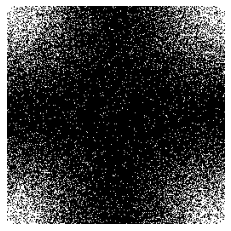

D:\Dataset\calgary\Test\Test\e14736s3_P55296.7.npy
10


In [3]:
fig = plt.figure()
plt.imshow(~var_sampling_mask, cmap = "gray")
plt.axis("off")
plt.show()

out_path = r"C:\Users\soggy\Videos\Hybrid-CS-Model-MRI\recs_combined"
# Test Set 
test_path = "D:\Dataset\calgary\Test\Test\*7.npy"
kspace_files = np.asarray(glob.glob(test_path))
print(kspace_files[-1])
print(len(kspace_files))

1/1 [==============================] - 5s 5s/step


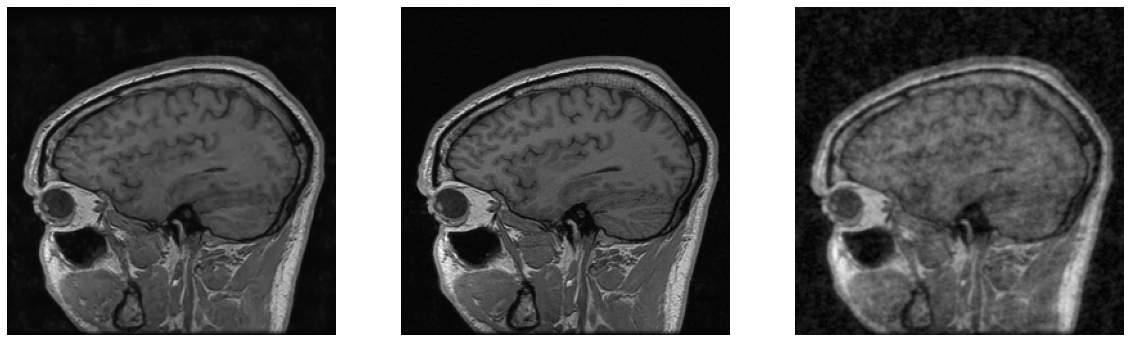

1/1 [==============================] - 6s 6s/step


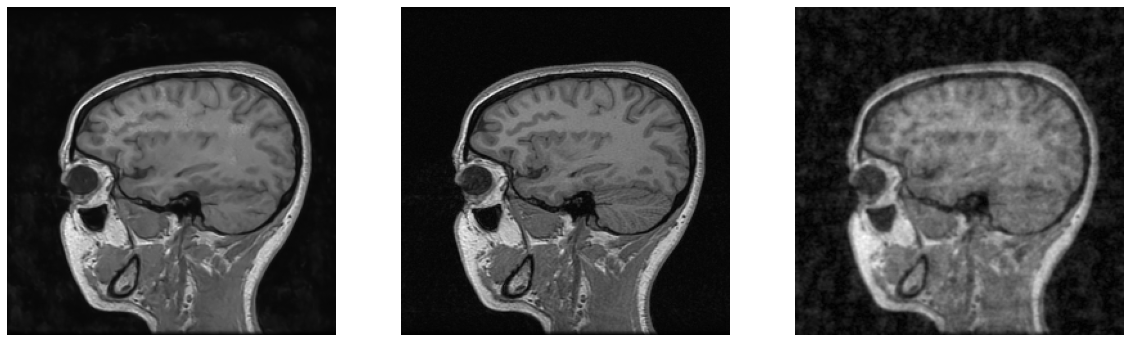

1/1 [==============================] - 5s 5s/step


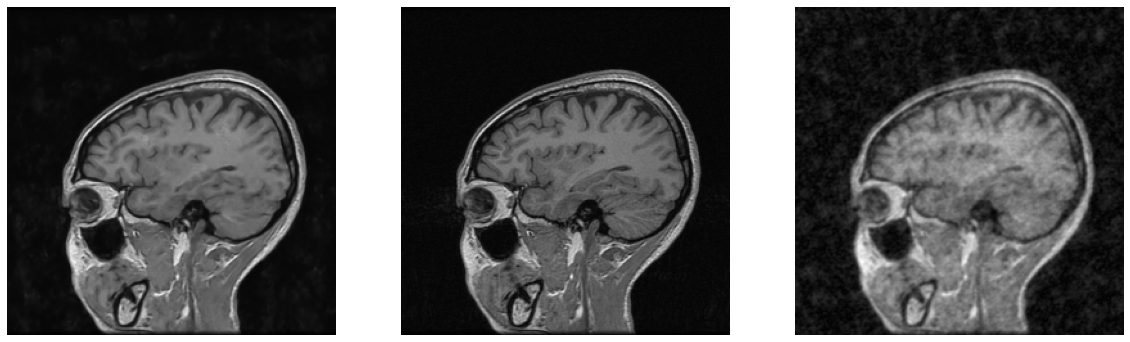

1/1 [==============================] - 5s 5s/step


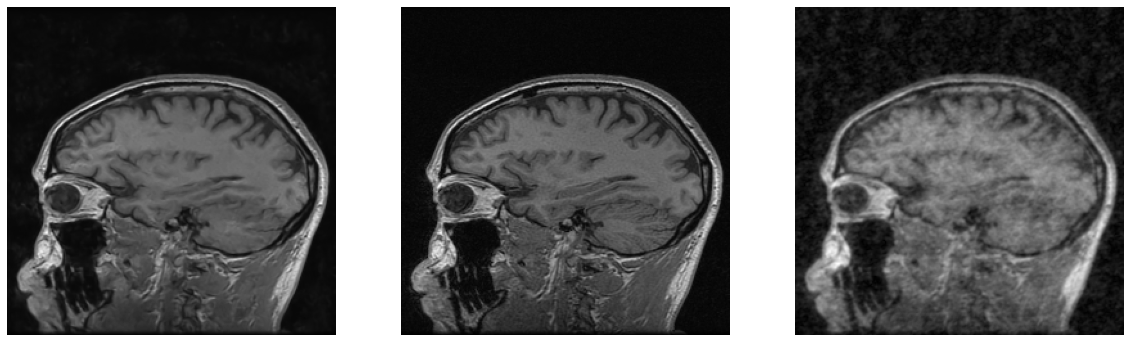

1/1 [==============================] - 5s 5s/step


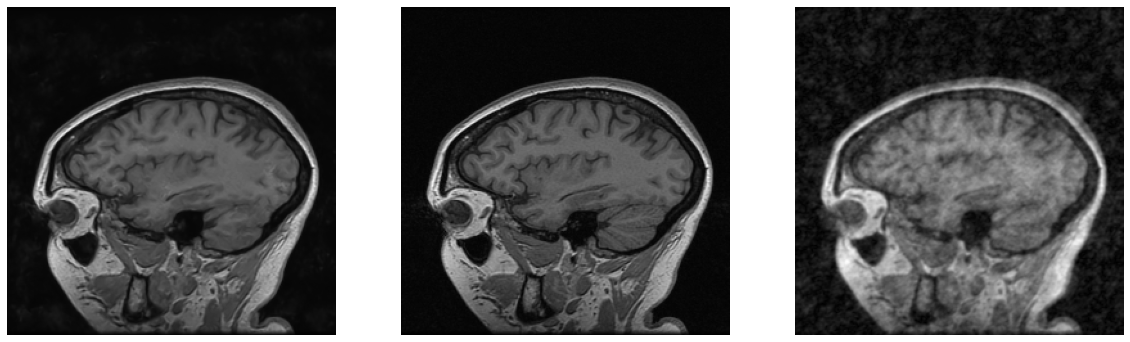

1/1 [==============================] - 4s 4s/step


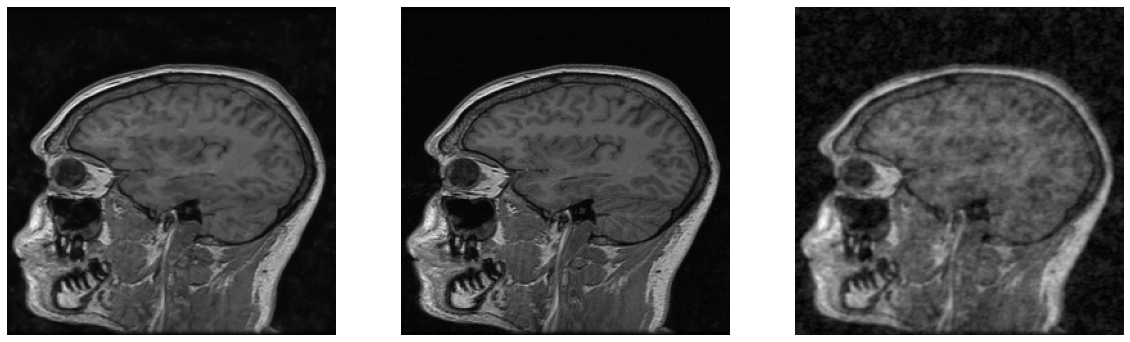

1/1 [==============================] - 6s 6s/step


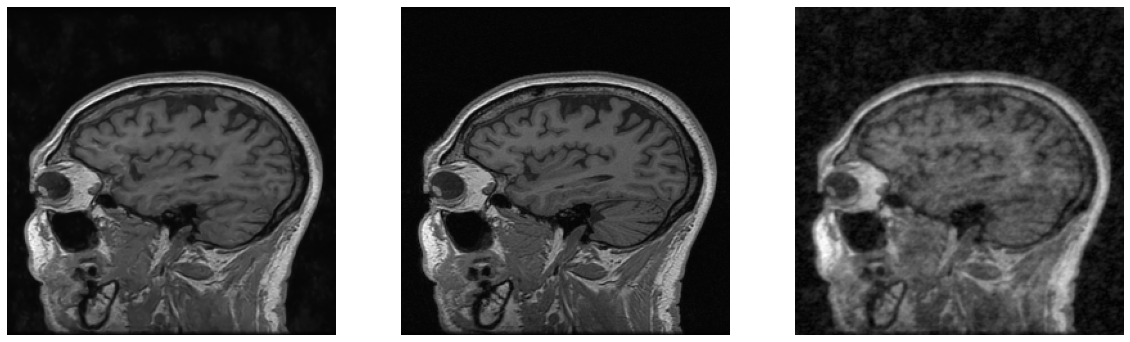

1/1 [==============================] - 4s 4s/step


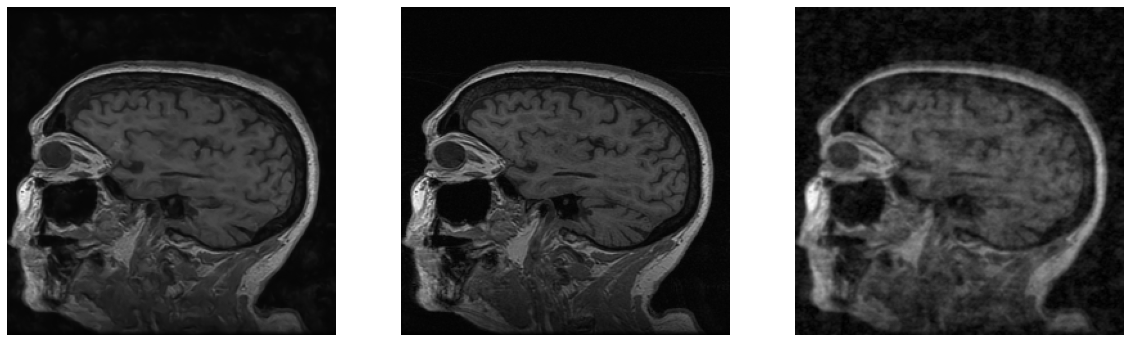

1/1 [==============================] - 5s 5s/step


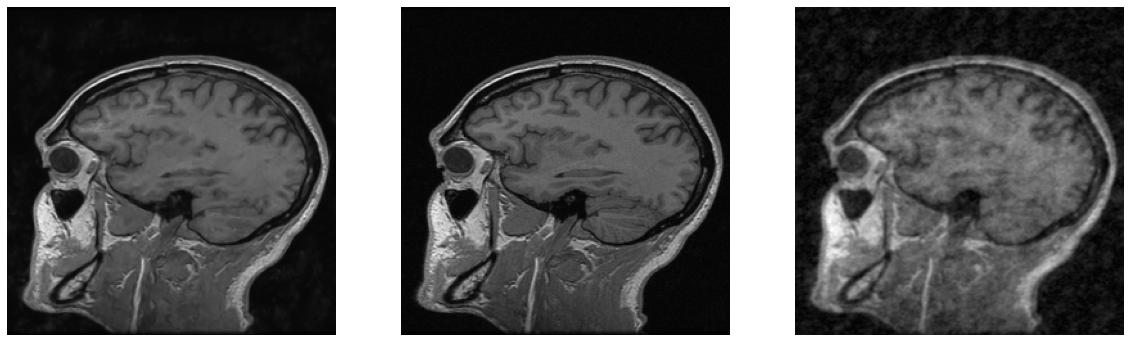

1/1 [==============================] - 5s 5s/step


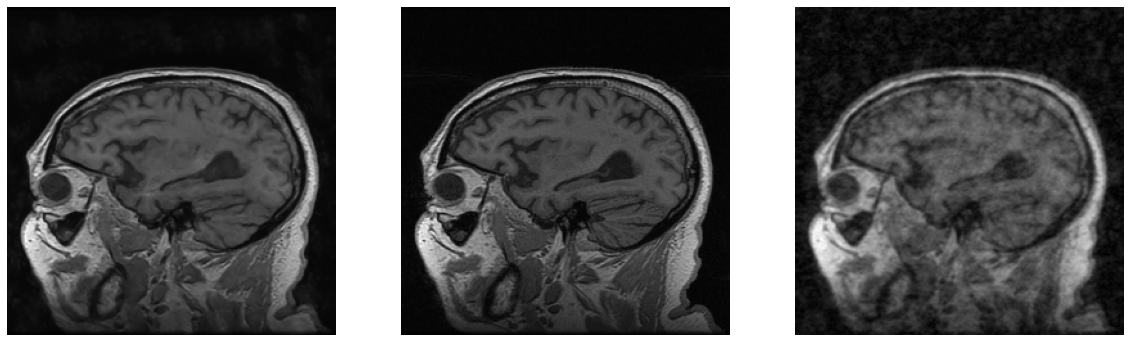

In [10]:
imshape = (256,256)
norm = np.sqrt(imshape[0]*imshape[1])

for jj in range(len(kspace_files)):
    kspace = np.load(kspace_files[jj])/norm
    kspace2 = kspace.copy()
    kspace[:,var_sampling_mask,:] = 0
    kspace = (kspace-stats[0])/stats[1]
    rec = np.abs(np.fft.ifft2(kspace2[:,:,:,0]+1j*kspace2[:,:,:,1])).astype(np.float64)
    rec_under = np.abs(np.fft.ifft2(kspace[:,:,:,0]+1j*kspace[:,:,:,1])).astype(np.float64)
    
    lil = []
    for i in range(50, 55):
        arr = []
        for j in range(3):
            arr.append(kspace[i + j])
        lil.append(arr)
        
    lil = np.array(lil)
    pred = model.predict(lil)[1].astype(np.float64)
    name = kspace_files[jj].split("/")[-1].split(".")[0] + "_hybrid_sm.npy"
    np.save(os.path.join(out_path,name),pred[:,:,:,0]*norm)
    fig = plt.figure(figsize=(20,20))
    plt.subplot(131)
    plt.imshow(pred[0,:,:,0], cmap = "gray")
    plt.axis("off")
    plt.subplot(132)
    plt.imshow(rec[51], cmap = "gray")
    plt.axis("off")
    plt.subplot(133)
    plt.imshow(rec_under[51], cmap = "gray")
    plt.axis("off")
    plt.show()

In [5]:
jj = 5
kspace = np.load(kspace_files[jj])/norm
kspace2 = kspace.copy()
kspace[:,var_sampling_mask,:] = 0
kspace = (kspace-stats[0])/stats[1]
rec = np.abs(np.fft.ifft2(kspace2[:,:,:,0]+1j*kspace2[:,:,:,1])).astype(np.float64)
rec.shape

(170, 256, 256)